In [1]:
import _MEWtools as mt
import multiprocessing

## Get baseline time for CPU Intensive Workload

In [2]:
iterations = 5

def slow_worker():
    for i in range(8000):
        square = i**i

    print('Done')

In [3]:
import time

# t0 = time.time()

# for i in range(iterations):
#     slow_worker()

# t1 = time.time()

# total = t1-t0
# display(f'Total Execution Time: {total} seconds')

## Perform same operation with multiprocessing

In [4]:
t0 = time.time()

pool = multiprocessing.Pool(iterations)
for i in range(iterations):
    pool.apply_async(slow_worker)
    
pool.close()
pool.join()

t1 = time.time()

total = t1-t0
display(f'Total Execution Time: {total} seconds')

Done
Done
Done
Done
Done


'Total Execution Time: 2.588454008102417 seconds'

## Load an interior structure from a config file and populate a MEWTools Satellite

In [5]:
import utils

overrides = {
    'obliquity': 0,
    'obliquityPhase': 0,
    'obliquityPhaseRate': 0,
    'spinRate': 0,
    'nonSynchronusRotationRate': 0,
    'librationAmplitude': 0,
    'librationPhase': 0,
    'librationFrequency': 0
}

sample_sat = utils.import_structure('Sample', overrides)

In [6]:
structures = utils.list_structures()
structures

Sample


['Sample']

In [7]:
import sympy as sym
import numpy as np

r, θ, φ, t = sym.symbols('r θ φ t', real = True)
sample_sat.tt.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
sample_sat.tt.expand()

-13369.3872888062*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) - 14.6928130577004*I*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 93585.7110216432*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 102.849691403903*I*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) - 13690.1623044156*cos(2.04661263817508e-5*t)*cos(2*θ) - 117.875147128307*I*cos(2.04661263817508e-5*t)*cos(2*θ) - 22175.3871428071*cos(2.04661263817508e-5*t) + 9.90608959403469*I*cos(2.04661263817508e-5*t) - 8805.99985400096*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 24.5989026517351*I*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 61641.9989780067*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ) - 172.192318562146*I*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ)

## Performance comparison of different evaluation methods

In [8]:
import math

fm = sym.lambdify([t, φ, θ], sample_sat.PC1, modules = ["math", {"cot": math.atan}])
fn = sym.lambdify([t, φ, θ], sample_sat.PC1, modules = ["numpy", {"cot": np.arctan}])

# numpy
t0 = time.time()

for i in range(10000):
    fm(0, np.pi/2, np.pi/2)

t1 = time.time()

total = t1-t0
display(f'Total Execution Time for math lamdify: {total} seconds')

#math
t0 = time.time()

for i in range(10000):
    fn(0, np.pi/2, np.pi/2)

t1 = time.time()

total = t1-t0
display(f'Total Execution Time for numpy lamdify: {total} seconds')



# Expand
t0 = time.time()

for i in range(10000):
     sample_sat.PC1.subs(t, 0).subs(φ,np.pi/2).subs(θ,np.pi/2).expand()

t1 = time.time()

total = t1-t0
display(f'Total Execution Time for expand(): {total} seconds')


print(sample_sat.PC1.subs(t, 0).subs(φ,np.pi/2).subs(θ,np.pi/2).expand())
print(fm(0, np.pi/2, np.pi/2))
print(fn(0, np.pi/2, np.pi/2))

'Total Execution Time for math lamdify: 0.05107307434082031 seconds'

'Total Execution Time for numpy lamdify: 0.3364701271057129 seconds'

'Total Execution Time for expand(): 0.7764790058135986 seconds'

16970.4496767830
16970.449676782948
16970.449676782948


In [9]:
# ttR = sym.re(sample_sat.tt.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand())
# ppR = sym.re(sample_sat.pp.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand())
# tpR = sym.re(sample_sat.tp.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand())

# import time

# diffs = []
# for i in range(1000):
#     t0 = time.time()

#     val1 = sample_sat.PC1.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
#     val2 = sample_sat.PC2.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
#     val3 = sample_sat.PCΨ.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
#     val4 = sample_sat.PCΨ2.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()

#     t1 = time.time()

#     total1 = t1-t0
# #     display(f'Total Execution Time: {total1} seconds')

#     import math
#     t0 = time.time()

#     pc1  = (1/2) * (ttR + ppR + math.sqrt(4*tpR**2 + (ttR-ppR)**2))
#     pc2  = (1/2) * (ttR + ppR - math.sqrt(4*tpR**2 + (ttR-ppR)**2))
#     pc3  = (1/2) * math.atan( (2*tpR)/(ttR-ppR))
#     pc4 = (1/2) * math.atan2((2*tpR),(ttR-ppR))

#     t1 = time.time()

#     total2 = t1-t0
# #     display(f'Total Optimized Execution Time: {total2} seconds')
#     diffs.append(total1 - total2)
    
# np.average(diffs)

## Checking degrees to radians performance with constant vs equation

In [10]:
# import time
# import numpy as np

# ITERATIONS = 100000

# t0 = time.time()

# for i in range(ITERATIONS):
#     rads = 60 * (np.pi / 180)

# t1 = time.time()

# total = t1-t0
# display(f'Rads: {rads}')
# display(f'Total Full Execution Time: {total} seconds')

# # With constant
# t0 = time.time()

# rad_multiplier = np.pi / 180
# for i in range(ITERATIONS):
#     rads = 60 * rad_multiplier

# t1 = time.time()

# total = t1-t0
# display(f'Rads: {rads}')
# display(f'Total Execution Time: {total} seconds')

**Theta = Longitude**

**Phi = Latitude**

## Lets try to build a grid

In [11]:
# import pandas as pd

# sat = utils.import_structure('Sample', overrides)

# TIME_STEPS = 1
# MIN_LAT = -90
# MAX_LAT = 90
# MIN_LON = -180
# MAX_LON = -170
# RAD_MULTIPLIER = np.pi / 180

# data = []


# def callback(stress_item):
#     data.append(stress_item)
    

# def get_stress(step, lat, lon):
#     lat_radians = lat * RAD_MULTIPLIER
#     lon_radians = lon * RAD_MULTIPLIER

#     principal1 = sat.PC1.subs(t,step).subs(φ,lat_radians).subs(θ,lon_radians).expand()
#     principal2 = sat.PC2.subs(t,0).subs(φ,lat_radians).subs(θ,lon_radians).expand()
#     principal_phi = sat.PCΨ.subs(t,0).subs(φ,lat_radians).subs(θ,lon_radians).expand()
#     principal_phi2 = sat.PCΨ2.subs(t,0).subs(φ,lat_radians).subs(θ,lon_radians).expand()

#     return {
#                 'time_step': step,
#                 'latitude': lat,
#                 'latitude_radians': lat_radians,
#                 'longitude': lon,
#                 'longitude_radians': lon_radians,
#                 'principal1': principal1,
#                 'principal2': principal2,
#                 'principal_phi': principal_phi,
#                 'principal_phi2': principal_phi2
#             }

    
# pool = multiprocessing.Pool(12)

# t0 = time.time()

# for step in range(TIME_STEPS):
#     for lat in range(MIN_LAT, MAX_LAT + 1):
# #         lat_radians = lat * RAD_MULTIPLIER

#         for lon in range(MIN_LON, MAX_LON + 1):
# #             lon_radians = lon * RAD_MULTIPLIER
#             pool.apply_async(get_stress, args = (step, lat, lon, ), callback=callback)
            
# pool.close()
# pool.join()

# t1 = time.time()
# total = (t1 - t0)
           
# print(f'Calculation time: {total}')
# df = pd.DataFrame(data)        
# display(df)

In [20]:
import pandas as pd
import math

sat = utils.import_structure('Sample', overrides)

TIME_STEPS = 360
MIN_LAT = -75
MAX_LAT = 90
MIN_LON = 0
MAX_LON = 360
RAD_MULTIPLIER = np.pi / 180

data = []

principal1_func = sym.lambdify([t, φ, θ], sample_sat.PC1, modules = ["math", {"cot": math.atan}])
principal2_func = sym.lambdify([t, φ, θ], sample_sat.PC2, modules = ["math", {"cot": math.atan}])
principal_phi_func = sym.lambdify([t, φ, θ], sample_sat.PCΨ, modules = ["math", {"cot": math.atan}])
principal_phi2_func = sym.lambdify([t, φ, θ], sample_sat.PCΨ2, modules = ["math", {"cot": math.atan}])


def callback(stress_items):
    data.extend(stress_items)
    

def get_stress_for_lat(step, lat):
    results = []
#     lat_radians = lat * RAD_MULTIPLIER
    lat_radians = np.radians(lat)
    step_value = step / 360
    
    for lon in range(MIN_LON, MAX_LON + 1, 10):
        if (lat == 90 or lon == 0):
            continue
            
#         lon_radians = np.Radians(lon) * RAD_MULTIPLIER
        lon_radians = np.radians(lon)

        principal1 = principal1_func(step_value, lat_radians, lon_radians)
#         principal1 = sat.PC1.subs(t,step_value).subs(φ,lat_radians).subs(θ,lon_radians).expand()

        principal2 = principal2_func(step, lat_radians, lon_radians)
        principal_phi = principal_phi_func(step, lat_radians, lon_radians)
        principal_phi2 = principal_phi2_func(step, lat_radians, lon_radians)        

        max_stress = max(principal1, principal2)
        max_stress_orientation = principal_phi if max_stress == principal1 else principal_phi2
  
        
        results.append({
                'time_step': step,
                'latitude': lat,
                'longitude': lon,
                'principal1': principal1,
                'principal2': principal2,
                'principal_orientation': principal_phi,
                'principal_orientation2': principal_phi2,
                'max_stress': max_stress,
                'max_stress_orientation': max_stress_orientation
            })
        
    return results

    
pool = multiprocessing.Pool()

t0 = time.time()

for step in range(TIME_STEPS):
    for lat in range(MIN_LAT, MAX_LAT + 1, 15):
        pool.apply_async(get_stress_for_lat, args = (step, lat, ), callback=callback)
#         data.extend(get_stress_for_lat(step, lat))
            
pool.close()
pool.join()
            
t1 = time.time()
total = (t1 - t0)
           
print(f'Calculation time: {total}')

df = pd.DataFrame(data)   
t2 = time.time()
print(f'DataFrame Creation time: {t2 - t1}')


Calculation time: 1.1562058925628662
DataFrame Creation time: 0.3113059997558594


,time_step,latitude,longitude,principal1,principal2,principal_orientation,principal_orientation2,max_stress,max_stress_orientation
257,0,45,60,29852.326093,-20885.938731,0.337259,-1.233537,29852.326093,0.337259
689,1,45,60,29852.326920,-20884.585109,0.337267,-1.233529,29852.326920,0.337267
1085,2,45,60,29852.327748,-20883.231485,0.337276,-1.233521,29852.327748,0.337276
1445,3,45,60,29852.328575,-20881.877860,0.337284,-1.233512,29852.328575,0.337284
1877,4,45,60,29852.329403,-20880.524233,0.337292,-1.233504,29852.329403,0.337292
...,...,...,...,...,...,...,...,...,...
140873,355,45,60,29852.619896,-20405.302000,0.340234,-1.230562,29852.619896,0.340234
141341,356,45,60,29852.620723,-20403.947829,0.340242,-1.230554,29852.620723,0.340242
141629,357,45,60,29852.621551,-20402.593657,0.340251,-1.230545,29852.621551,0.340251
142277,358,45,60,29852.622378,-20401.239483,0.340259,-1.230537,29852.622378,0.340259


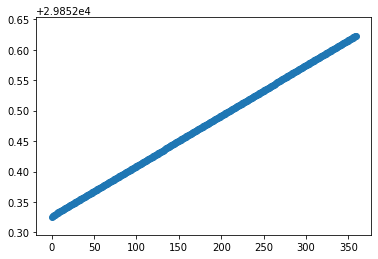

In [21]:
data = df.loc[(df['latitude'] == 45) & (df['longitude'] == 60)] \
    .sort_values('time_step')

import matplotlib.pyplot as plt

plt.scatter(data['time_step'], data['principal1'])
data

In [14]:
lat = 60
lon = 250

print(principal1_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))
print(principal2_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))
print(principal_phi_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))
print(principal_phi2_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))

34312.59369333008
-58538.576862267844
0.3044505895029529
-1.2663457372919438


In [23]:
df.sort_values(['latitude', 'longitude', 'time_step'])

,time_step,latitude,longitude,principal1,principal2,principal_orientation,principal_orientation2,max_stress,max_stress_orientation
0,0,-75,10,33120.327187,-104416.754087,-0.420355,1.150441,33120.327187,-0.420355
360,1,-75,10,33120.324368,-104415.772412,-0.420344,1.150453,33120.324368,-0.420344
972,2,-75,10,33120.321549,-104414.790732,-0.420332,1.150464,33120.321549,-0.420332
1152,3,-75,10,33120.318730,-104413.809045,-0.420320,1.150476,33120.318730,-0.420320
1620,4,-75,10,33120.315910,-104412.827353,-0.420309,1.150488,33120.315910,-0.420309
...,...,...,...,...,...,...,...,...,...
140975,355,75,360,34030.954656,-106137.569612,0.432665,-1.138131,34030.954656,0.432665
141335,356,75,360,34030.957606,-106138.629183,0.432677,-1.138119,34030.957606,0.432677
141767,357,75,360,34030.960555,-106139.688747,0.432689,-1.138108,34030.960555,0.432689
142091,358,75,360,34030.963505,-106140.748304,0.432700,-1.138096,34030.963505,0.432700
